In [55]:
import sys
print(sys.executable)
# note this route for installing fbprophet
#    https://github.com/conda/conda/issues/8923
# run curl -SLO https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh 
# run conda update -y conda
# conda create -n test -y zlib
# on the new environment ie conda activate ....
# conda install -c anaconda ephem
# conda install -c conda-forge fbprophet
# pip install fbprophet
# pip install jupyter notebook and then launch it from there

c:\users\henry\anaconda3\envs\test\python.exe


In [2]:
!pip install fbprophet

In [3]:
!conda install -c conda-forge fbprophet -y

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
!pip install --upgrade plotly

In [5]:
from fbprophet import Prophet

In [6]:
import pandas as pd

In [7]:
pwd


'C:\\Users\\Henry\\FBPROPHET VS OTHERS'

In [8]:
data = pd.read_csv('select_stock.csv')
data.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


In [9]:
data = data.drop(['nikkei','ftse','dax'],axis =1)

In [10]:
data.head(5)

,date,spx
0,07/01/1994,469.90
1,10/01/1994,475.27
2,11/01/1994,474.13
3,12/01/1994,474.17
4,13/01/1994,472.47


In [11]:
# formant fbprohet requires the columns head to be named

data.columns = ['ds','y']

In [12]:
data.head(4)

,ds,y
0,07/01/1994,469.90
1,10/01/1994,475.27
2,11/01/1994,474.13
3,12/01/1994,474.17


<AxesSubplot:xlabel='ds'>

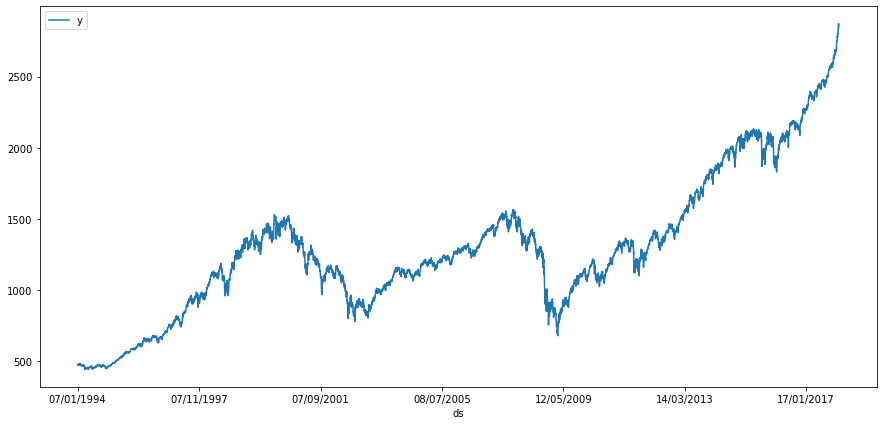

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

data.plot(x = 'ds', y ='y',figsize=(15,7))

In [14]:
data.info


<bound method DataFrame.info of               ds            y
0     07/01/1994   469.900000
1     10/01/1994   475.270000
2     11/01/1994   474.130000
3     12/01/1994   474.170000
4     13/01/1994   472.470000
...          ...          ...
6264  23/01/2018  2839.130362
6265  24/01/2018  2837.544008
6266  25/01/2018  2839.253031
6267  26/01/2018  2872.867839
6268  29/01/2018  2853.528411

[6269 rows x 2 columns]>

In [15]:
# import datetime
from datetime import datetime

data.ds = pd.to_datetime(data.ds,dayfirst=True)
data.head(3)

,ds,y
0,1994-01-07,469.90
1,1994-01-10,475.27
2,1994-01-11,474.13


In [16]:
len(data)

6269

In [17]:
c

6257

In [19]:
train= data.iloc [:6257]

In [20]:
test = data.iloc [6257:]

In [22]:
train.shape , test.shape

((6257, 2), (12, 2))

In [23]:
train.head(5)

,ds,y
0,1994-01-07,469.90
1,1994-01-10,475.27
2,1994-01-11,474.13
3,1994-01-12,474.17
4,1994-01-13,472.47


In [24]:
model = Prophet()

In [25]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
# create a placeholder to hold our predictions

future = model.make_future_dataframe(periods=12,freq ='b')

In [27]:
future.shape

(6269, 1)

In [28]:
future.tail()

,ds
6264,2018-01-23
6265,2018-01-24
6266,2018-01-25
6267,2018-01-26
6268,2018-01-29


In [29]:
test.tail()

,ds,y
6264,2018-01-23,2839.130362
6265,2018-01-24,2837.544008
6266,2018-01-25,2839.253031
6267,2018-01-26,2872.867839
6268,2018-01-29,2853.528411


In [35]:
test.head()

,ds,y
6257,2018-01-12,2786.244143
6258,2018-01-15,2786.244143
6259,2018-01-16,2776.420024
6260,2018-01-17,2802.555574
6261,2018-01-18,2798.030257


In [30]:
forecast = model.predict(future)

In [32]:
forecast.head(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1994-01-07,443.983487,366.814743,524.321650,443.983487,443.983487,3.779413,3.779413,3.779413,-4.450976,-4.450976,-4.450976,8.230388,8.230388,8.230388,0.0,0.0,0.0,447.762900
1,1994-01-10,444.248848,360.923166,527.494475,444.248848,444.248848,0.600000,0.600000,0.600000,-5.164708,-5.164708,-5.164708,5.764709,5.764709,5.764709,0.0,0.0,0.0,444.848848
2,1994-01-11,444.337301,363.299458,524.542967,444.337301,444.337301,0.229446,0.229446,0.229446,-4.484396,-4.484396,-4.484396,4.713843,4.713843,4.713843,0.0,0.0,0.0,444.566748
3,1994-01-12,444.425755,361.865376,518.938988,444.425755,444.425755,-0.857929,-0.857929,-0.857929,-4.425402,-4.425402,-4.425402,3.567473,3.567473,3.567473,0.0,0.0,0.0,443.567826


In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6264,2018-01-23,2498.065896,2420.244157,2588.225486
6265,2018-01-24,2497.827545,2410.472208,2575.263137
6266,2018-01-25,2497.863038,2413.018753,2580.435763
6267,2018-01-26,2497.647074,2415.787013,2584.232229
6268,2018-01-29,2497.878378,2414.866590,2585.639135


<AxesSubplot:>

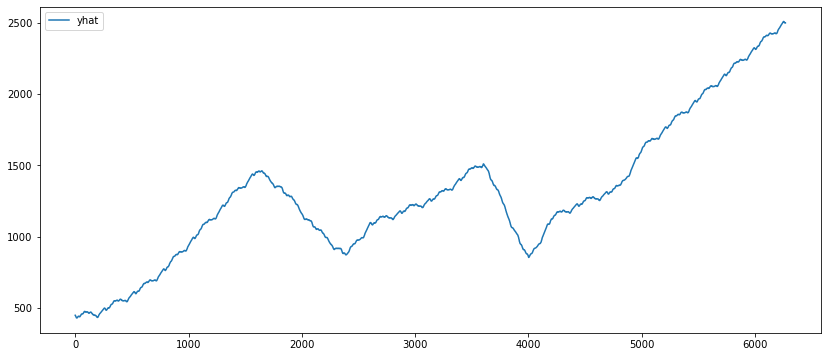

In [34]:
forecast.yhat.plot(legend=True,figsize =(14,6))

In [41]:
forecast.shape

(6269, 19)

In [42]:
forecast_train= forecast.iloc [:6257]

In [43]:
forecast_test =  forecast.iloc [6257:]

<AxesSubplot:title={'center':'Actual vs Forecast'}, xlabel='ds'>

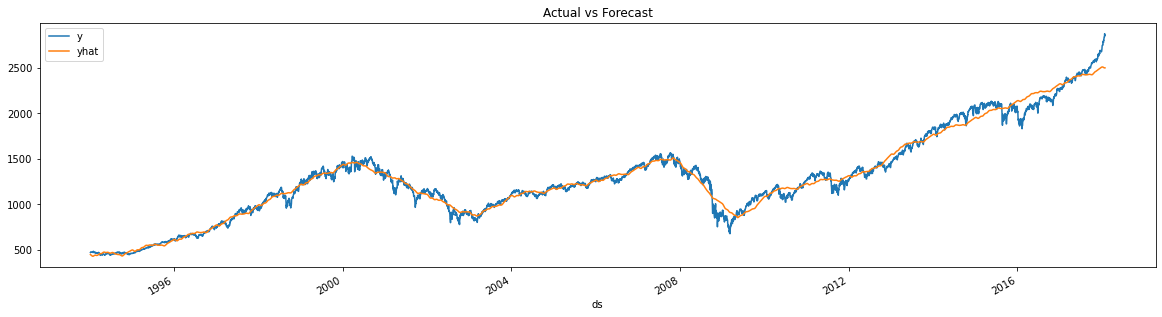

In [52]:
# plotting the actual and forecast values

ax = (data.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
forecast.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [48]:
! pip install sklearn
! pip install numpy
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


In [53]:

print(np.sqrt(mean_squared_error(test['y'],forecast_test.yhat )))

320.8803740359132


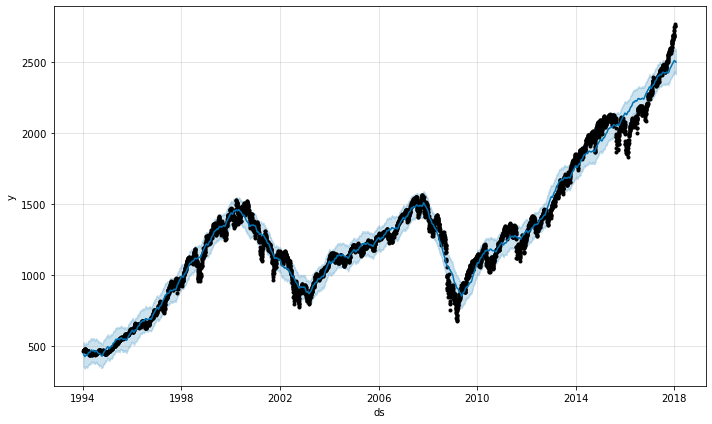

In [50]:
# You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.
fig1 = model.plot(forecast)

# From all my Analysis, fbprophet appears to be the least performer.


# thanks,

# Henry Nwachukwu